In [40]:
#IMPORTING LIBRAIRIES 
import numpy as np
import os
import pandas as pd
import neurokit2 as nk
from scipy.signal import find_peaks
from scipy import signal
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('Project/eda_dataset.csv')
#ORIGINAL DATA IS 

In [42]:
data

,ID,Task,EDA
0,2ea4,Baseline,39014
1,2ea4,Baseline,38980
2,2ea4,Baseline,38951
3,2ea4,Baseline,38935
4,2ea4,Baseline,38919
...,...,...,...
35413995,y9z6,Video2,4244
35413996,y9z6,Video2,4246
35413997,y9z6,Video2,4238
35413998,y9z6,Video2,4226


In [44]:
destination_folder = r"C:\Users\manar.gani\Project\EDA"
root_folder = r"C:\Users\manar.gani\Project\eda_dataset.csv"

In [28]:
"""#time function 
def creation_base_time(data):
    list_time = pd.date_range("20240403", periods = len(data), freq = "0.01S")
    time=[]
    for date in list_time:
        time_str = date.strftime("%M:%S.%f")
        time.append(time_str[:-4]
                   )
    return time  """

In [407]:
#testing example data
data=pd.read_csv(r"Project/2ea4_Counting1_eda_data.csv")
len(data)

30000

In [408]:
data

,EDA
0,44574
1,44628
2,44572
3,44599
4,44573
...,...
29995,60167
29996,60167
29997,60144
29998,60199


In [31]:
"""list_time = pd.date_range("20240403", periods = len(data), freq = "0.01S")
#list_time

In [410]:
#Creating time index 

import pandas as pd


original_freq = 500  # Example original frequency in Hz
num_samples = len(data)  # Number of samples in the original signal
time_indices = [i / original_freq for i in range(num_samples)]  # Generate time indices

# Add the time indices as a new column to the DataFrame
data['Time'] = time_indices

# Display the DataFrame with time indices
print(data)


         EDA    Time
0      44574   0.000
1      44628   0.002
2      44572   0.004
3      44599   0.006
4      44573   0.008
...      ...     ...
29995  60167  59.990
29996  60167  59.992
29997  60144  59.994
29998  60199  59.996
29999  60222  59.998

[30000 rows x 2 columns]


In [411]:
eda_signal = pd.DataFrame({"time" : data['Time'], "Amplitude": data["EDA"]})
#EDA_SIGNAL fram

In [372]:
eda_signal

,time,Amplitude
0,0.000,39014
1,0.002,38980
2,0.004,38951
3,0.006,38935
4,0.008,38919
...,...,...
29995,59.990,37314
29996,59.992,37287
29997,59.994,37287
29998,59.996,37253


In [314]:
'''time= []
for date in list_time:
    time_str = date.strftime("%M:%S.%f")
    time.append(time_str[:-4])
time[-1]'''

'04:59.99'

In [315]:
'''eda_signal = pd.DataFrame({"Time" : time, "Amplitude": data["EDA"]})
eda_signal["Amplitude"]

0        44574
1        44628
2        44572
3        44599
4        44573
         ...  
29995    60167
29996    60167
29997    60144
29998    60199
29999    60222
Name: Amplitude, Length: 30000, dtype: int64

In [365]:
"""signal_filtered = nk.signal_filter(eda_signal["Amplitude"].values,100, highcut=5, method = "butterworth", order=4)
#signal_filtered

         time  Amplitude
0       0.000      44574
1       0.002      44628
2       0.004      44572
3       0.006      44599
4       0.008      44573
...       ...        ...
29995  59.990      60167
29996  59.992      60167
29997  59.994      60144
29998  59.996      60199
29999  59.998      60222

[30000 rows x 2 columns]
         time  Amplitude  Smoothed_Amplitude
0       0.000      44574        44574.000000
1       0.002      44628        44601.000000
2       0.004      44572        44591.333333
3       0.006      44599        44593.250000
4       0.008      44573        44589.200000
...       ...        ...                 ...
29995  59.990      60167        60158.000000
29996  59.992      60167        60158.940000
29997  59.994      60144        60159.820000
29998  59.996      60199        60160.940000
29999  59.998      60222        60162.040000

[30000 rows x 3 columns]


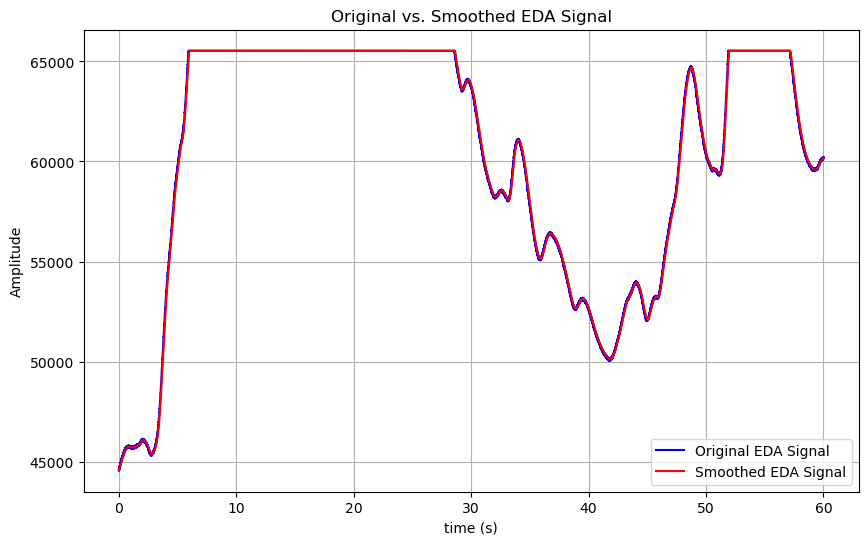

In [412]:
#downsampling and moving average to smooth the signal 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def downsample(df, original_freq, target_freq):
    period = original_freq // target_freq
    downsampled_df = df.iloc[::period, :].reset_index(drop=True)
    return downsampled_df

def moving_average(df, window_size, sampling_rate):
    window_length = int(window_size * sampling_rate)
    smoothed_signal = df['Amplitude'].rolling(window=window_length, min_periods=1).mean()
    df['Smoothed_Amplitude'] = smoothed_signal
    return df

# Down-sample to 100 Hz
target_freq = 500
eda_signal_downsampled = downsample(eda_signal, original_freq=500, target_freq=target_freq)
print(eda_signal_downsampled)

# Apply 1-second moving average
window_size = 0.1 # in seconds
sampling_rate = target_freq  # target sampling rate
eda_signal_processed = moving_average(eda_signal_downsampled, window_size=window_size, sampling_rate=sampling_rate)

print (eda_signal_processed)
# Plot original and smoothed EDA signals
plt.figure(figsize=(10, 6))
plt.plot(eda_signal['time'], eda_signal['Amplitude'], label='Original EDA Signal', color='blue')
plt.plot(eda_signal_processed['time'], eda_signal_processed['Smoothed_Amplitude'], label='Smoothed EDA Signal', color='red')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs. Smoothed EDA Signal')
plt.legend()
plt.grid(True)
plt.show()
 


In [413]:
#PREPROCESSING THE SIGNAL 



EDAPROCESS = pd.DataFrame({"Time" : eda_signal_processed['time'], "unprocessed signal" : eda_signal["Amplitude"], "processed signal" : eda_signal_processed['Smoothed_Amplitude']})



In [414]:
EDAPROCESS

,Time,unprocessed signal,processed signal
0,0.000,44574,44574.000000
1,0.002,44628,44601.000000
2,0.004,44572,44591.333333
3,0.006,44599,44593.250000
4,0.008,44573,44589.200000
...,...,...,...
29995,59.990,60167,60158.000000
29996,59.992,60167,60158.940000
29997,59.994,60144,60159.820000
29998,59.996,60199,60160.940000


In [415]:
#Processing the THE PREPROCESSED SIGNAL 

signal_processed,info=nk.eda_process(EDAPROCESS["processed signal"].values, sampling_rate=500, method ='neurokit', report=None)

In [416]:
signal_processed.to_csv('edaprocessedfromsmoothed.csv')

In [417]:
signal_processed

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,44574.000000,44574.990846,47153.539468,-2578.546627,0,0,0.0,0.0,0.0,0,0.0
1,44601.000000,44576.736027,47156.038158,-2579.300131,0,0,0.0,0.0,0.0,0,0.0
2,44591.333333,44578.523517,47158.538043,-2580.012522,0,0,0.0,0.0,0.0,0,0.0
3,44593.250000,44580.353496,47161.039123,-2580.683618,0,0,0.0,0.0,0.0,0,0.0
4,44589.200000,44582.226129,47163.541399,-2581.313257,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,60158.000000,60120.137805,64380.694088,-40.037550,0,0,0.0,0.0,0.0,0,0.0
29996,60158.940000,60120.147157,64380.694066,-36.965349,0,0,0.0,0.0,0.0,0,0.0
29997,60159.820000,60120.154778,64380.694048,-33.893827,0,0,0.0,0.0,0.0,0,0.0
29998,60160.940000,60120.160909,64380.694032,-30.822745,0,0,0.0,0.0,0.0,0,0.0


In [418]:
# clean function uses Low-pass filter with a 3 Hz cutoff frequency and a 4th order
#preprocessing from raw data with neuro kit2 


signal_processedfromraw,info=nk.eda_process(eda_signal["Amplitude"].values, sampling_rate=500, method ='neurokit', report=None)

In [419]:
signal_processedfromraw.to_csv('edaprocessedfromraw.csv')

In [420]:
signal_processedfromraw

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,44574,44596.702012,47219.320346,-2622.616277,0,0,0.0,0.0,0.0,0,0.0
1,44628,44599.763129,47221.846242,-2622.081052,0,0,0.0,0.0,0.0,0,0.0
2,44572,44602.881388,47224.373335,-2621.489882,0,0,0.0,0.0,0.0,0,0.0
3,44599,44606.056317,47226.901625,-2620.843238,0,0,0.0,0.0,0.0,0,0.0
4,44573,44609.287410,47229.431112,-2620.141628,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,60167,60146.549763,64363.126503,-39.156656,0,0,0.0,0.0,0.0,0,0.0
29996,60167,60146.555435,64363.126481,-36.151460,0,0,0.0,0.0,0.0,0,0.0
29997,60144,60146.560061,64363.126462,-33.146297,0,0,0.0,0.0,0.0,0,0.0
29998,60199,60146.563787,64363.126446,-30.141022,0,0,0.0,0.0,0.0,0,0.0


In [421]:
signal_filtered = nk.signal_filter(eda_signal["Amplitude"].values ,500, highcut=3, method = "butterworth", order=4)
#signal_filtered RAW

In [422]:
 signal_filtered = pd.DataFrame({"Time" : eda_signal_processed['time'], "unfiltered signal" : eda_signal["Amplitude"], "filtered signal" :signal_filtered})

In [423]:
 signal_filtered

,Time,unfiltered signal,filtered signal
0,0.000,44574,44596.702012
1,0.002,44628,44599.763129
2,0.004,44572,44602.881388
3,0.006,44599,44606.056317
4,0.008,44573,44609.287410
...,...,...,...
29995,59.990,60167,60146.549763
29996,59.992,60167,60146.555435
29997,59.994,60144,60146.560061
29998,59.996,60199,60146.563787


In [424]:
signal_filteredfromprocessed = nk.signal_filter(EDAPROCESS["processed signal"].values ,500, highcut=3, method = "butterworth", order=4)
#signal_filtered 

In [425]:
 signal_filteredfromprocessed = pd.DataFrame({"Time" : eda_signal_processed['time'], "unfiltered signal" : eda_signal["Amplitude"], "filtered signal" :signal_filteredfromprocessed})

In [426]:
 signal_filteredfromprocessed

,Time,unfiltered signal,filtered signal
0,0.000,44574,44574.990846
1,0.002,44628,44576.736027
2,0.004,44572,44578.523517
3,0.006,44599,44580.353496
4,0.008,44573,44582.226129
...,...,...,...
29995,59.990,60167,60120.137805
29996,59.992,60167,60120.147157
29997,59.994,60144,60120.154778
29998,59.996,60199,60120.160909


In [427]:
EDA_FILTERED = pd.DataFrame({"Time" : eda_signal_processed['time'], "unfiltered signal" : eda_signal["Amplitude"], "filtered signal from processed" :signal_filteredfromprocessed["filtered signal"], "filtered signal from raw" : signal_filtered ["filtered signal"] ,"clean signal from raw " :signal_processed["EDA_Clean"],"clean signal processed " :signal_processedfromraw["EDA_Clean"]})
       


In [428]:
EDA_FILTERED

,Time,unfiltered signal,filtered signal from processed,filtered signal from raw,clean signal from raw,clean signal processed
0,0.000,44574,44574.990846,44596.702012,44574.990846,44596.702012
1,0.002,44628,44576.736027,44599.763129,44576.736027,44599.763129
2,0.004,44572,44578.523517,44602.881388,44578.523517,44602.881388
3,0.006,44599,44580.353496,44606.056317,44580.353496,44606.056317
4,0.008,44573,44582.226129,44609.287410,44582.226129,44609.287410
...,...,...,...,...,...,...
29995,59.990,60167,60120.137805,60146.549763,60120.137805,60146.549763
29996,59.992,60167,60120.147157,60146.555435,60120.147157,60146.555435
29997,59.994,60144,60120.154778,60146.560061,60120.154778,60146.560061
29998,59.996,60199,60120.160909,60146.563787,60120.160909,60146.563787


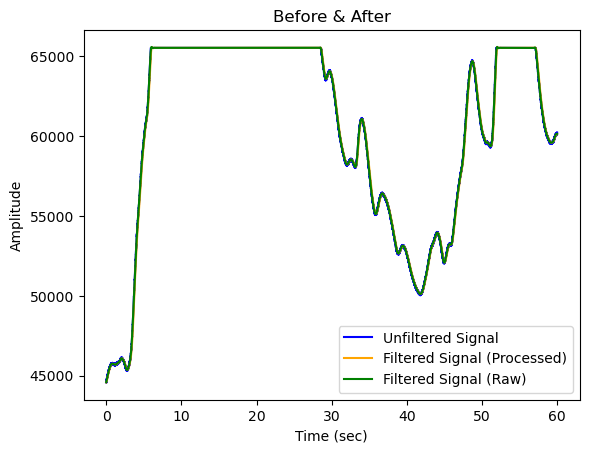

In [429]:
import matplotlib.pyplot as plt

# Assuming EDA_FILTERED is your DataFrame containing the columns you want to visualize

# Plotting all columns in the same plot with different colors
plt.plot(EDA_FILTERED["Time"], EDA_FILTERED["unfiltered signal"], color='blue', label='Unfiltered Signal')
plt.plot(EDA_FILTERED["Time"], EDA_FILTERED["filtered signal from processed"], color='orange', label='Filtered Signal (Processed)')
plt.plot(EDA_FILTERED["Time"], EDA_FILTERED["filtered signal from raw"], color='green', label='Filtered Signal (Raw)')

# Adding title and labels
plt.title("Before & After")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")

# Show the legend
plt.legend()

# Show the plot
plt.show()


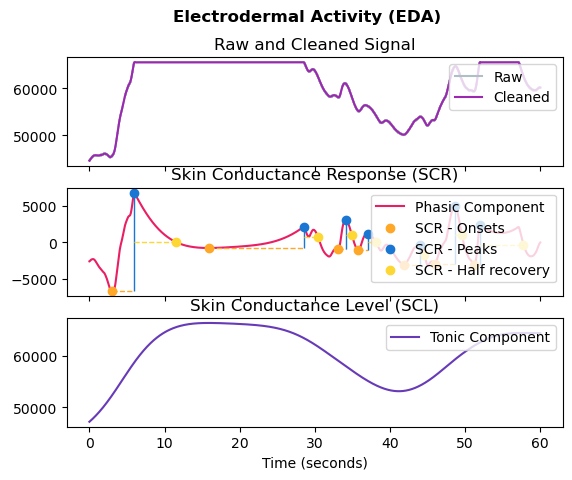

In [430]:
nk.eda_plot(signal_processedfromraw,info)

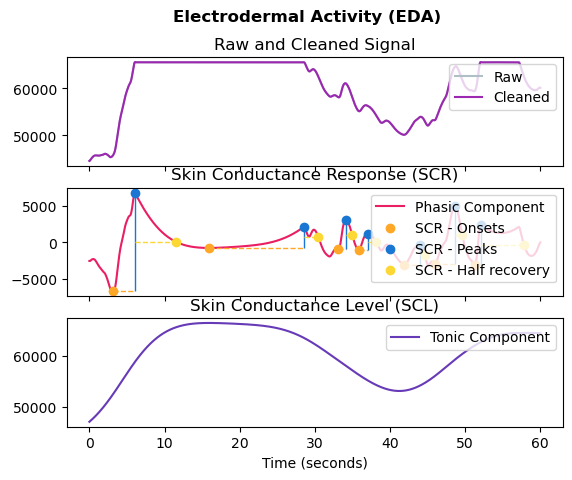

In [431]:
nk.eda_plot(signal_processed,info)

In [432]:
signal_filteredphasic = nk.signal_filter(signal_processed["EDA_Phasic"].values,500, lowcut=0.05, method = "butterworth", order=4)
#signal_filtered

In [433]:
phasic_filtered = pd.DataFrame({"Time" : eda_signal_processed['time'] , "Amplitude" :signal_filteredphasic })
#ecg_filtered

In [434]:
phasic_filtered 

,Time,Amplitude
0,0.000,-499.848700
1,0.002,-501.394699
2,0.004,-502.899864
3,0.006,-504.364014
4,0.008,-505.786983
...,...,...
29995,59.990,-46.813490
29996,59.992,-44.343857
29997,59.994,-41.876286
29998,59.996,-39.410535


In [435]:
EDAPHASIC = pd.DataFrame({"Time" : eda_signal_processed['time'], "unfiltered signalphasic" : signal_processed["EDA_Phasic"], "filtered phasic signal" : phasic_filtered ["Amplitude"]})

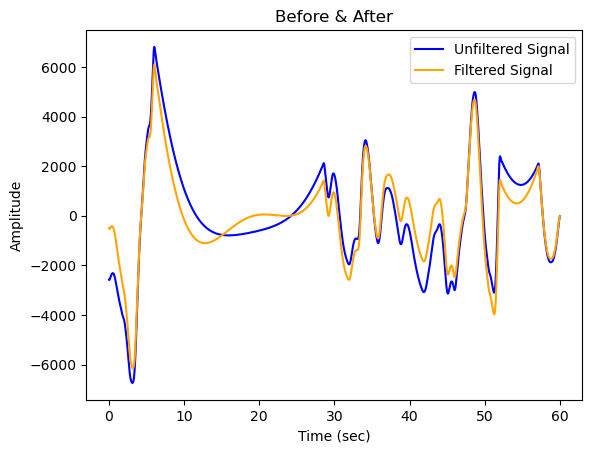

In [437]:


import matplotlib.pyplot as plt

# Assuming EDA_FILTERED is your DataFrame containing the columns you want to visualize

# Plotting all columns in the same plot with different colors
plt.plot(EDAPHASIC["Time"], EDAPHASIC["unfiltered signalphasic"], color='blue', label='Unfiltered Signal')
plt.plot(EDAPHASIC["Time"], EDAPHASIC["filtered phasic signal"], color='orange', label='Filtered Signal ')


# Adding title and labels
plt.title("Before & After")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [438]:
eda_peaks,info=nk.eda_peaks(EDAPHASIC["filtered phasic signal"], sampling_rate=500, method='neurokit', amplitude_min=0.1)

In [439]:
features=[info["SCR_Onsets"],info["SCR_Peaks"],info["SCR_Recovery"]]

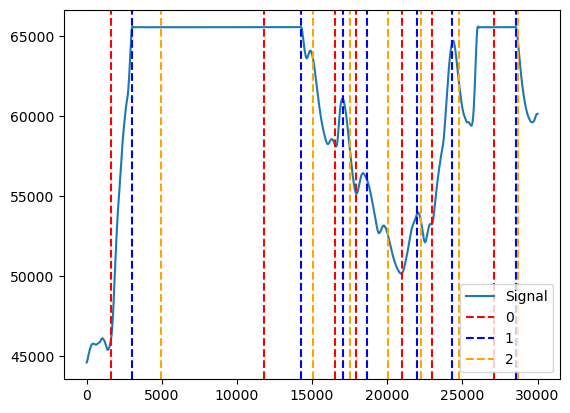

In [440]:
plot= nk.events_plot(features,signal_processed["EDA_"],color=['red','blue','orange'])

In [441]:
print(features)

[array([ 1592, 11771, 16492, 17901, 20949, 23005, 27129], dtype=int64), array([ 3015, 14282, 17078, 18619, 21982, 24321, 28572], dtype=int64), array([ 4918., 15073., 17524., 20048., 22276., 24744., 28703.])]


In [442]:
print(info["SCR_Peaks"])

[ 3015 14282 17078 18619 21982 24321 28572]


In [365]:
"""signal_filtered = nk.signal_filter(eda_signal["Amplitude"].values,100, highcut=5, method = "butterworth", order=4)
#signal_filtered

In [390]:
print(info["SCR_Peaks"])

[ 3956  6761  8657 10581 12534 14491 19817 23067 24869 26755]


In [ ]:
#fonction qui filtre le signal de 1 seule expérience
def preprocessing_one_ecg_signal(ID, Task, data, destination_folder):
    #creation base de temps car pas le même nombre de point pour chaque expérience
    time = creation_base_time(data)

    #Filtrage
    signal_filtered = nk.signal_filter(data["ECG"].values, 250, highcut=0.5, method = "butterworth", order=5)
    #dataframe avec le temps les données filtrées et non filtrées
    ecg_df = pd.DataFrame({"Time" : time, "Signal non filtré" : data["ECG"], "Signal filtré" : signal_filtered})
    
    #tracé de des courbes avant et après filtrage
    #ecg_df.plot(x="Time", y=["Signal non filtré", "Signal filtré"], title="Comparaison signaux ecg")
    #plt.xlabel("Time(min)")
    #plt.ylabel("Amplitude")

    #Enregistrement du dataframe en fichier csv 
    filename = ID + '_' + Task + '_ecg_data_filtered.csv'
    completeDestination = destination_folder + "\\"+ ID
    if not os.path.exists(completeDestination):
        os.makedirs(completeDestination)
    ecg_df.to_csv(os.path.join(completeDestination, filename), sep=';', index=False)
    return

In [339]:
import pandas as pd
import numpy as np
import neurokit2 as nk
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignore the warning


def eda_stat(array, sampling_freq=1000):
    x = np.array(array)
    eda = nk.eda_phasic(x, sampling_freq)
    scr = np.array(eda['EDA_Phasic'])
    scl = np.array(eda['EDA_Tonic'])
    x_axis = np.linspace(0, scl.shape[0]/sampling_freq, scl.shape[0])
    slope = np.polyfit(x_axis,scl,1)[0]
    
    df = pd.DataFrame(data = [x.max(), x.min(), x.mean(), x.std(),
                              stats.kurtosis(x), stats.skew(x), np.quantile(x,0.5),
                              x.max()/x.min(), slope, scr.max(), scr.min(), scr.mean(), scr.std(),
                              scl.max(), scl.min(), scl.mean(), scl.std()]).T

    df.columns = ['max_eda', 'min_eda', 'mean_eda', 'sd_eda', 'ku_eda', 'sk_eda', 'median_eda',
                  'dynrange','scl_slope', 'max_scr', 'min_scr', 'mean_scr', 'sd_scr', 'max_scl', 
                  'min_scl', 'mean_scl', 'sd_scl']
      # Plot tonic and phasic signals
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, scl, label='Tonic')
    plt.plot(x_axis, scr, label='Phasic')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Tonic and Phasic Components of EDA Signal')
    plt.legend()
    plt.show()
    
    return df

def eda_time(array, sampling_freq=1000):
    x = np.array(array)
    eda = nk.eda_phasic(x, sampling_freq)
    scr = np.array(eda['EDA_Phasic'])
    
    _, info = nk.eda_peaks(scr, sampling_freq)
    peaks = info['SCR_Peaks']
    amplitude = info['SCR_Amplitude']
    recovery = info['SCR_RecoveryTime']
    
    nSCR = len(info['SCR_Peaks']) / (x.shape[0]/sampling_freq/60)
    aucSCR = np.trapz(scr)
    meanAmpSCR = np.nanmean(amplitude)
    maxAmpSCR = np.nanmax(amplitude)
    meanRespSCR = np.nanmean(recovery)
    sumAmpSCR = np.nansum(amplitude) / (x.shape[0]/sampling_freq/60)
    sumRespSCR = np.nansum(recovery) / (x.shape[0]/sampling_freq/60)

    df = pd.DataFrame(data = [nSCR, aucSCR, meanAmpSCR, maxAmpSCR, meanRespSCR,
                             sumAmpSCR, sumRespSCR]).T
    
    df.columns = ['nSCR', 'aucSCR', 'meanAmpSCR', 'maxAmpSCR', 'meanRespSCR',
                  'sumAmpSCR', 'sumRespSCR']
    
    return df

def extract_features(eda_signal, sampling_freq=1000):
    df_stat = eda_stat(eda_signal, sampling_freq)
    df_time = eda_time(eda_signal, sampling_freq)
    df = pd.concat([df_stat, df_time], axis=1)
   

    return df
    

def get_eda_features(df, sampling_freq=500):
    groups = df.groupby(['ID', 'Task'])['EDA']  # Group by both 'ID' and 'Task'
    features = {name: extract_features(group, sampling_freq) for name, group in groups}
    features_df = pd.concat(features, axis=0).reset_index(level=None, drop=False)  # Reset index for both 'ID' and 'Task'
    return features_df

# Sample code to use the function
eda_features = get_eda_features(data)
print(eda_features)

KeyError: 'ID'

In [4]:
# How many missing data points do we have
missing_values_count = data.isnull().sum()
# How many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
# Percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [6]:
eda_features.to_csv('eda_featuress.csv', index=False)

In [11]:
eda_features.columns = ['ID', 'Task'] + list(eda_features.columns[2:])

In [13]:
eda_features.drop(columns=['level_2'], inplace=True)


In [14]:
eda_features

,ID,Task,max_eda,min_eda,mean_eda,sd_eda,ku_eda,sk_eda,median_eda,dynrange,...,min_scl,mean_scl,sd_scl,nSCR,aucSCR,meanAmpSCR,maxAmpSCR,meanRespSCR,sumAmpSCR,sumRespSCR
0,2ea4,Baseline,56253.0,35988.0,45100.185067,5806.606472,-1.186786,0.382027,43225.0,1.563104,...,38676.079592,45237.802936,5170.077355,10.000000,-1.953193e+06,85.927498,136.576703,0.066600,859.274979,0.666000
1,2ea4,Breathing,46865.0,31207.0,35353.471967,3998.570819,-0.456695,0.869399,33932.0,1.501746,...,31481.741409,35328.242815,3803.749825,7.666667,4.239990e+05,87.145277,118.548242,0.107913,668.113791,0.827333
2,2ea4,Counting1,65535.0,44544.0,60566.371600,6118.537426,-0.177212,-0.995414,63943.0,1.471242,...,47182.421693,60640.063109,5082.682206,8.000000,-3.851747e+05,79.962406,144.249968,0.044500,639.699251,0.356000
3,2ea4,Counting2,65535.0,46424.0,55933.009533,6961.959914,-1.476860,0.280863,54374.5,1.411662,...,47805.063220,55848.024054,6529.726833,7.000000,2.315782e+06,82.258624,109.783300,0.082571,575.810371,0.578000
4,2ea4,Counting3,63860.0,48543.0,55602.832933,3935.623149,-1.077760,-0.093202,56228.0,1.315535,...,49721.883413,55545.619740,3562.041626,14.000000,2.067259e+06,90.542010,126.847989,0.113714,1267.588136,1.592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,y9z6,Relax,19047.0,7256.0,11157.679213,3550.828007,-1.089242,0.592116,9663.0,2.625000,...,7542.884273,11154.603470,3516.612560,1581.200000,4.841922e+05,152.845485,308.491781,0.009581,241679.281137,13.849600
770,y9z6,Speaking,21063.0,13422.0,18623.716267,1380.921718,1.852889,-0.937297,18693.0,1.569289,...,14756.615219,18651.055743,953.316810,8.000000,3.859480e+05,193.113994,261.663198,0.284500,1544.911954,2.276000
771,y9z6,Stroop,20620.0,14129.0,17316.667467,1751.644738,-1.043776,0.301482,17121.0,1.459410,...,15052.858387,17260.485184,1633.790636,662.000000,1.237532e+06,197.446043,277.165129,0.024598,130709.280405,15.054000
772,y9z6,Video1,9944.0,4766.0,7345.586402,1278.627889,-0.866352,0.043605,7183.0,2.086446,...,5000.462669,7349.303928,1246.424192,2975.862069,-2.509599e+04,144.050636,334.109884,0.004747,428674.824359,11.234483


C:\Users\manar.gani\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


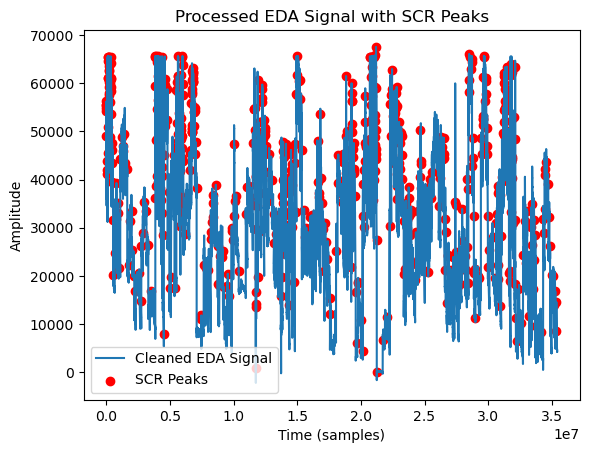

In [44]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Load your EDA signal data from CSV file into a DataFrame
eda_data = pd.read_csv('eda_dataset.csv')

# Extract the EDA signal column from the DataFrame
eda_signal = eda_data["EDA"].values  # Replace "eda_column_name" with the actual column name containing the EDA signal

# Process the EDA signal
signals, info = nk.eda_process(eda_signal, sampling_rate=250)

# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

# Visualize the processed signal and features
plt.plot(cleaned, label="Cleaned EDA Signal")
plt.scatter(info["SCR_Peaks"], signals["EDA_Clean"].iloc[info["SCR_Peaks"]], color='red', label="SCR Peaks")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Processed EDA Signal with SCR Peaks")
plt.legend()
plt.show()
